<a href="https://colab.research.google.com/github/ghn9zh/GSS_Lab/blob/main/GSS_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

file_path= "/content/GSS.xlsx"
data=pd.read_excel(file_path)

print(data.head()) #display the first few rows

   year  id_ childs     sex             income          happy  \
0  1972    1      0  FEMALE  .i:  Inapplicable  Not too happy   
1  1972    2      5    MALE  .i:  Inapplicable  Not too happy   
2  1972    3      4  FEMALE  .i:  Inapplicable   Pretty happy   
3  1972    4      0  FEMALE  .i:  Inapplicable  Not too happy   
4  1972    5      2  FEMALE  .i:  Inapplicable   Pretty happy   

              hapmar     health                 satjob             ballot  
0  .i:  Inapplicable       Good  A little dissatisfied  .i:  Inapplicable  
1  .i:  Inapplicable       Fair      .i:  Inapplicable  .i:  Inapplicable  
2  .i:  Inapplicable  Excellent   Moderately satisfied  .i:  Inapplicable  
3  .i:  Inapplicable       Good         Very satisfied  .i:  Inapplicable  
4  .i:  Inapplicable       Good      .i:  Inapplicable  .i:  Inapplicable  


In [8]:
#View column names, get stat summary, and check values

print(data.columns)
print(data.describe())
print(data.isnull().sum())


Index(['year', 'id_', 'childs', 'sex', 'income', 'happy', 'hapmar', 'health',
       'satjob', 'ballot'],
      dtype='object')
               year           id_
count  72390.000000  72390.000000
mean    1997.715541   1241.796395
std       15.109995    912.273245
min     1972.000000      1.000000
25%     1985.000000    534.000000
50%     1998.000000   1083.000000
75%     2010.000000   1722.000000
max     2022.000000   4510.000000
year      0
id_       0
childs    0
sex       0
income    0
happy     0
hapmar    0
health    0
satjob    0
ballot    0
dtype: int64


In [22]:
# 1. Dropped rows with missing values
data_clean = data.dropna()

# 2. Removed invalid values from all columns
invalid_values = ['.i:  Inapplicable', '.n:  No answer',
                  '.d:  Do not Know/Cannot Choose', '.s:  Skipped on Web',
                  '.r:  Refused']

data_cleaned = data_clean.copy()  # Made a copy to avoid modifying the original dataframe

for col in ["happy", "hapmar", "health", "satjob", "sex", "income"]:
    data_cleaned = data_cleaned[~data_cleaned[col].isin(invalid_values)]

# 3. Converted categorical data to numeric
ordinal_mapping = {
    "happy": {"Not Too Happy": 1, "Pretty Happy": 2, "Very Happy": 3},
    "hapmar": {"Not Too Happy": 1, "Pretty Happy": 2, "Very Happy": 3},
    "health": {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4},
    "satjob": {"Very Dissatisfied": 1, "A Little Dissatisfied": 2, "Moderately Satisfied": 3, "Very Satisfied": 4},
    "sex": {"Male": 0, "Female": 1}
}

# Apply mapping
for col, mapping in ordinal_mapping.items():
    data_cleaned.loc[:, col] = data_cleaned[col].replace(mapping)

# 4. Checked if cleaning worked
print("\nSummary of cleaned dataset:")
print(data_cleaned.info())

# 5. Displayed summary statistics
print("\nSummary Statistics:")
print(data_cleaned.describe())

# 6. Checked for missing values
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())

# 7. Checked unique values to confirm cleaning
for col in ["happy", "hapmar", "health", "satjob", "sex", "income"]:
    print(f"\nUnique values in {col}:\n", data_cleaned[col].unique())

# 8. Looked at the cleaned dataset
data_cleaned.head()



Summary of cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 19174 entries, 1613 to 72389
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    19174 non-null  int64 
 1   id_     19174 non-null  int64 
 2   childs  19174 non-null  object
 3   sex     19174 non-null  object
 4   income  19174 non-null  object
 5   happy   19174 non-null  object
 6   hapmar  19174 non-null  object
 7   health  19174 non-null  object
 8   satjob  19174 non-null  object
 9   ballot  19174 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.6+ MB
None

Summary Statistics:
               year           id_
count  19174.000000  19174.000000
mean    1994.860749   1192.964379
std       15.780522    879.141670
min     1973.000000      1.000000
25%     1982.000000    521.000000
50%     1994.000000   1047.000000
75%     2008.000000   1594.000000
max     2022.000000   4471.000000

Missing values after cleaning:
year      0
id_   

<ipython-input-22-f869965b4f53>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned.loc[:, col] = data_cleaned[col].replace(mapping)


,year,id_,childs,sex,income,happy,hapmar,health,satjob,ballot
1613,1973,1,1,MALE,"$10,000 to $14,999",Not too happy,VERY HAPPY,2,Very satisfied,.i: Inapplicable
1614,1973,2,2,FEMALE,"$7,000 to $7,999",Very happy,VERY HAPPY,3,Very satisfied,.i: Inapplicable
1615,1973,3,8 or more,FEMALE,"$10,000 to $14,999",Pretty happy,VERY HAPPY,4,Very satisfied,.i: Inapplicable
1616,1973,4,2,MALE,"$10,000 to $14,999",Pretty happy,VERY HAPPY,4,Moderately satisfied,.i: Inapplicable
1617,1973,5,4,FEMALE,"$10,000 to $14,999",Pretty happy,PRETTY HAPPY,3,Moderately satisfied,.i: Inapplicable


In [38]:
#Main Summary of Stats
summary_stats = data_cleaned.describe()
summary_stats.to_csv("summary_stats.csv")
print(summary_stats)

# More numeric summaries
# 1. Summary of happiness levels by job satisfaction
happiness_by_job = data_cleaned.groupby("satjob")["happy"].describe()

# 2. Summary of health conditions by job satisfaction
health_by_job = data_cleaned.groupby("satjob")["health"].describe()

#3. Summary of happiness by health condtions
happiness_by_health = data_cleaned.groupby("health")["happy"].describe()

#Display the Summaries
happiness_by_job.to_csv("happiness_by_job.csv")
health_by_job.to_csv("health_by_job.csv")
happiness_by_health.to_csv("happiness_by_health.csv")

               year           id_
count  19174.000000  19174.000000
mean    1994.860749   1192.964379
std       15.780522    879.141670
min     1973.000000      1.000000
25%     1982.000000    521.000000
50%     1994.000000   1047.000000
75%     2008.000000   1594.000000
max     2022.000000   4471.000000


<class 'pandas.core.frame.DataFrame'>
Index: 19174 entries, 1613 to 72389
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    19174 non-null  int64 
 1   id_     19174 non-null  int64 
 2   childs  19174 non-null  object
 3   sex     19174 non-null  object
 4   income  19174 non-null  object
 5   happy   19174 non-null  object
 6   hapmar  19174 non-null  object
 7   health  19174 non-null  object
 8   satjob  19174 non-null  object
 9   ballot  19174 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB
               year           id_
count  19174.000000  19174.000000
mean    1994.860749   1192.964379
std       15.780522    879.141670
min     1973.000000      1.000000
25%     1982.000000    521.000000
50%     1994.000000   1047.000000
75%     2008.000000   1594.000000
max     2022.000000   4471.000000


<ipython-input-31-045a507fe2aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned["happy"], palette= "viridis")


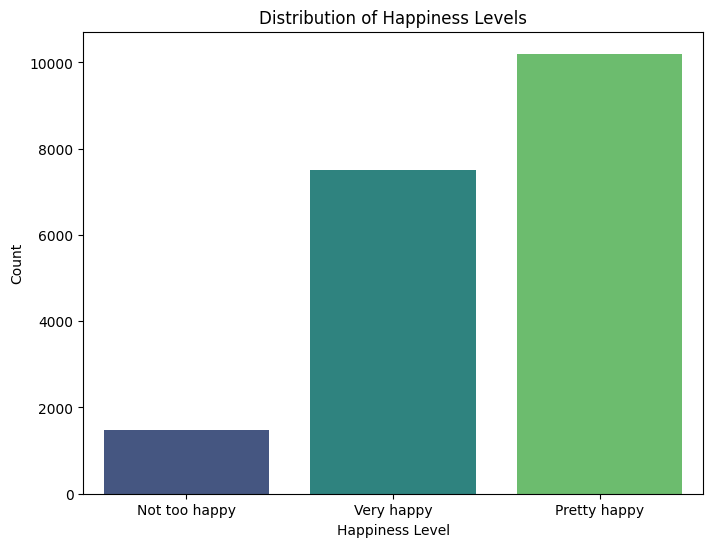

<ipython-input-31-045a507fe2aa>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="satjob", y="happy", data=data_cleaned, palette="turbo")


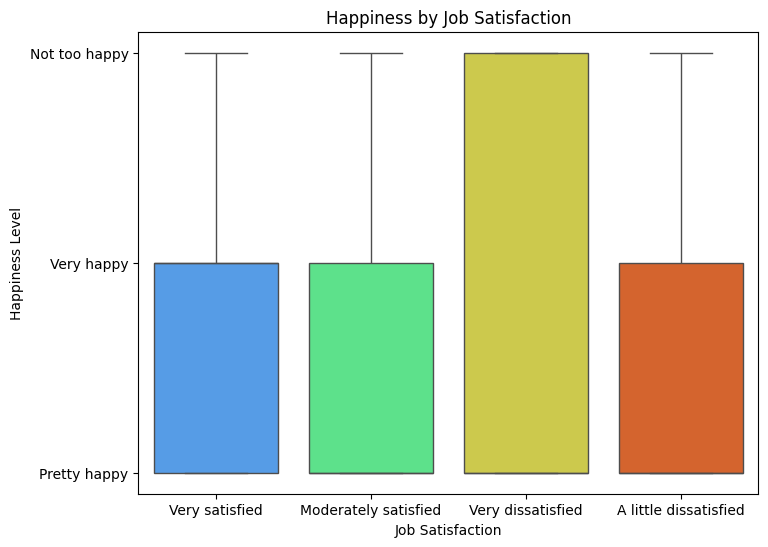

<ipython-input-31-045a507fe2aa>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="health", y="happy", data=data_cleaned, palette="plasma")


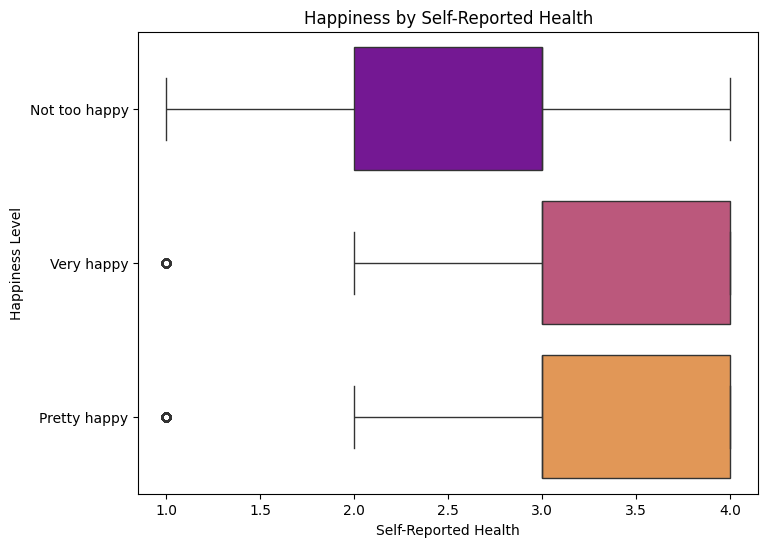

ValueError: could not convert string to float: 'MALE'

In [31]:
#Making Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

#Generate Summary Stats
summary_stats = data_cleaned.describe()
data_cleaned.info()
print(summary_stats)

#Distribution of Happiness Levels
plt.figure(figsize=(8, 6))
sns.countplot(x=data_cleaned["happy"], palette= "viridis")
plt.title("Distribution of Happiness Levels")
plt.xlabel("Happiness Level")
plt.ylabel("Count")
plt.show()

#Happiness by job satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x="satjob", y="happy", data=data_cleaned, palette="turbo")
plt.title("Happiness by Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Happiness Level")
plt.show()

#Happiness by Self-Reported Health
plt.figure(figsize=(8, 6))
sns.boxplot(x="health", y="happy", data=data_cleaned, palette="plasma")
plt.title("Happiness by Self-Reported Health")
plt.xlabel("Self-Reported Health")
plt.ylabel("Happiness Level")
plt.show()

